# Note book to Download the Dataset for Model Training

In [1]:
!pip install mlstac rasterio numpy pandas tqdm tacoreader

# 1 . Load the Dataset using TACO 

In [2]:
import tacoreader as taco
import rasterio
import numpy as np
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Load the official CloudSEN12+ Level-1C dataset
dataset = taco.load("tacofoundation:cloudsen12-l1c")

print(f" Connected to CloudSEN12+ via TACO API — total samples: {len(dataset)}")

 Connected to CloudSEN12+ via TACO API — total samples: 50247


# 2. Sample 5 random indices

In [3]:
# Let's pick 5 random indices
sample_indices = np.random.choice(len(dataset), 10, replace=False)
print("Random sample indices:", sample_indices)

sample_idx = sample_indices[0]
sample = dataset.read(sample_idx)

print("Sample object type:", type(sample))
print("\nSample content preview:\n", sample)

Random sample indices: [10752 34216 42793 14485 19738  8070 46162 34548 24582 46638]
Sample object type: <class 'tacoreader.v1.TortillaDataFrame.TortillaDataFrame'>

Sample content preview:
                                     internal:subfile tortilla:id  \
0  /vsisubfile/16648490749_1584873,/vsicurl/https...       s2l1c   
1  /vsisubfile/16650075622_943,/vsicurl/https://h...      target   

  tortilla:file_format tortilla:data_split  tortilla:offset  tortilla:length  \
0                GTiff                None      16648490749          1584873   
1                GTiff                None      16650075622              943   

     stac:crs                             stac:geotransform stac:raster_shape  \
0  EPSG:32720  [666200.0, 10.0, 0.0, 9156850.0, 0.0, -10.0]        [512, 512]   
1  EPSG:32720  [666200.0, 10.0, 0.0, 9156850.0, 0.0, -10.0]        [512, 512]   

   stac:time_start  stac:time_end                 stac:centroid  
0     1.579185e+09   1.579185e+09  POINT (-61.470051 

# 3. Find Tiles with label type = "high"

In [4]:
import numpy as np

# 1️⃣ Find ALL sample indices where label_type == "high"
high_indices = np.where(dataset["label_type"] == "high")[0]

print(f"Total HIGH labeled rows: {len(high_indices)}")     # ≈ 10847
print(f"Total UNIQUE HIGH tiles: {len(np.unique(dataset['tortilla:offset'][high_indices]))}")

# 2️⃣ Pick 10 random HIGH samples
rand_high = np.random.choice(high_indices, 10, replace=False)

print("\nRandom HIGH sample indices:\n", rand_high)

# 3️⃣ Inspect one sample like before
sample_idx = rand_high[0]
sample = dataset.read(sample_idx)

print("\nSample object type:", type(sample))
print("\nSample content preview:\n", sample)

Total HIGH labeled rows: 10847
Total UNIQUE HIGH tiles: 10846

Random HIGH sample indices:
 [ 3421  5162   357 27239 49960  5628  4688 24351  4785 50175]

Sample object type: <class 'tacoreader.v1.TortillaDataFrame.TortillaDataFrame'>

Sample content preview:
                                     internal:subfile tortilla:id  \
0  /vsisubfile/4634707835_1884951,/vsicurl/https:...       s2l1c   
1  /vsisubfile/4636592786_6689,/vsicurl/https://h...      target   

  tortilla:file_format tortilla:data_split  tortilla:offset  tortilla:length  \
0                GTiff                None       4634707835          1884951   
1                GTiff                None       4636592786             6689   

     stac:crs                             stac:geotransform stac:raster_shape  \
0  EPSG:32617  [347370.0, 10.0, 0.0, 3036630.0, 0.0, -10.0]        [512, 512]   
1  EPSG:32617  [347370.0, 10.0, 0.0, 3036630.0, 0.0, -10.0]        [512, 512]   

   stac:time_start  stac:time_end                

# Find the USEFUL tiles

In [5]:
high_sample_indices = dataset.index[ dataset["label_type"] == "high" ].tolist()

print(len(high_sample_indices))
print(high_sample_indices[:1500])

10847
[1498, 1499, 1500, 1501, 1502, 37325, 37326, 37327, 37328, 37329, 37330, 37331, 37332, 37333, 37334, 37335, 37336, 37337, 37338, 37339, 37340, 37341, 37342, 37343, 37344, 37345, 37346, 37347, 37348, 37349, 403, 404, 405, 406, 407, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 37350, 37351, 37352, 37353, 37354, 37355, 37356, 37357, 37358, 37359, 37360, 37361, 37362, 37363, 37364, 37365, 37366, 37367, 37368, 37369, 37370, 37371, 37372, 37373, 37374, 37375, 37376, 37377, 37378, 37379, 37380, 37381, 37382, 37383, 37384, 37385, 37386, 37387, 37388, 37389, 37390, 37391, 37392, 37393, 37394, 408, 409, 410, 411, 412, 37395, 37396, 37397, 37398, 37399, 37400, 37401, 37402, 37403, 37404, 37405, 37406, 37407, 37408, 37409, 37410, 37411, 37412, 37413, 37414, 37415, 37416, 37417, 37418, 37419, 37420, 37421, 37422, 37423, 37424, 37425, 37426, 37427, 37428, 37429, 37430, 37431, 37432, 37433, 37434, 37435, 37436, 37437, 37438, 37439, 1513, 1514, 1515, 1516, 1517, 37440, 37441, 3744

# Sample TILE with Mask read from Dataset

2025-11-16 23:07:00,378 - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Unique mask values: [0 1 3]


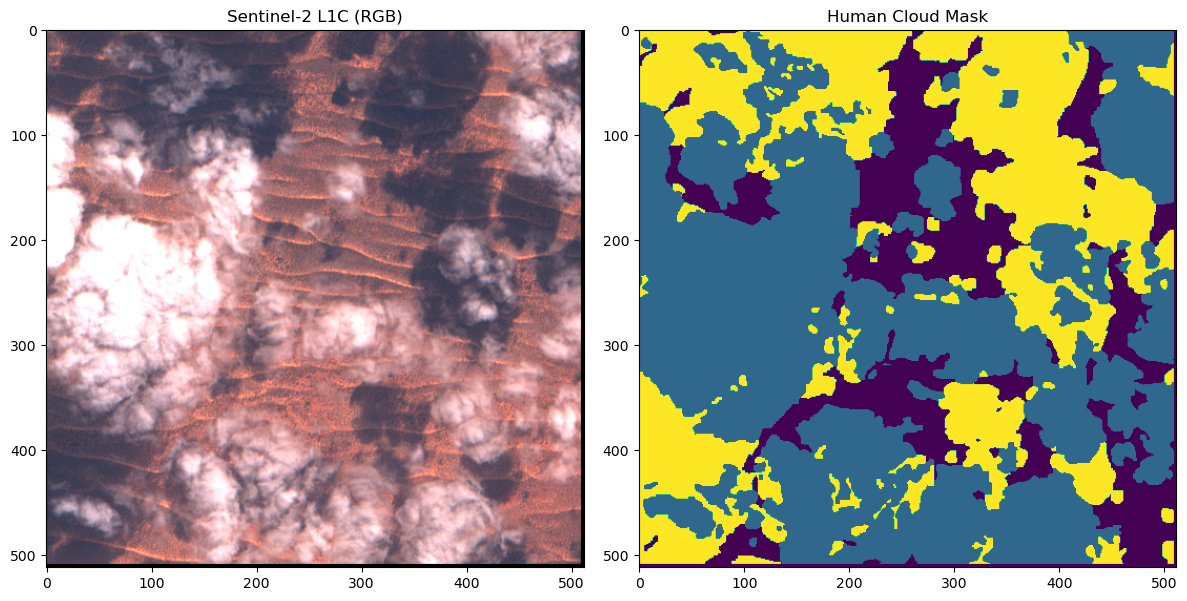

In [9]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

# Pick any valid sample index
sample_idx = 1498

# Retrieve asset paths
s2_l1c_path = dataset.read(sample_idx).read(0)
s2_label_path = dataset.read(sample_idx).read(1)

# Read L1C bands (B4,B3,B2 for RGB)
with rio.open(s2_l1c_path) as src:
    rgb = src.read([4,3,2], window=rio.windows.Window(0,0,512,512))

# Read the human cloud mask
with rio.open(s2_label_path) as lbl:
    mask = lbl.read(1)

# Show unique mask values
print("Unique mask values:", np.unique(mask))

# Visualize
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(rgb.transpose(1,2,0) / 3000)
ax[0].set_title("Sentinel-2 L1C (RGB)")

ax[1].imshow(mask)
ax[1].set_title("Human Cloud Mask")
plt.tight_layout()
plt.show()

# Find Tiles with unique mask values (0,1,2,3) from the dataset.

# STEP 1 — Build full list of HIGH tiles

In [10]:
high_sample_indices = dataset.index[ dataset["label_type"] == "high" ].tolist()
print("Total high tiles:", len(high_sample_indices))

Total high tiles: 10847


# STEP 2 — Extract unique mask values for each tile

In [14]:
import numpy as np
import rasterio as rio
import pandas as pd
from tqdm import tqdm

records = []

for idx in tqdm(high_sample_indices, desc="Scanning mask values"):

    s = dataset.read(idx)          # returns 2-row TortillaDataFrame
    mask_path = s.read(1)          # ALWAYS the mask asset

    try:
        with rio.open(mask_path) as src:
            vals = tuple(sorted(np.unique(src.read(1))))
    except:
        vals = ("ERR",)

    records.append((idx, vals))

df_masks = pd.DataFrame(records, columns=["sample_idx", "uniq_values"])

Scanning mask values: 100%|██████████| 10847/10847 [3:39:27<00:00,  1.21s/it] 


# STEP 3 — DEFINE allowed subsets

In [15]:
from itertools import combinations

VALID_VALUES = (0,1,2,3)

ALLOWED_SUBSETS = set(
    tuple(sorted(c))
    for n in range(1,5)
    for c in combinations(VALID_VALUES, n)
)


# STEP 4 — REMOVE BAD MASKS (99, 255, etc.)

In [16]:
df_clean = df_masks[ df_masks["uniq_values"].isin(ALLOWED_SUBSETS) ]
print("Valid tiles:", len(df_clean))


Valid tiles: 4465


In [18]:
df_masks["uniq_values"].value_counts().to_frame().to_csv("mask_value_distribution.csv")
df_clean.to_csv("clean_high_tiles.csv", index=False)

df_clean.head()


,sample_idx,uniq_values
0,1498,"(0, 1, 3)"
1,1499,"(0, 1, 3)"
2,1500,"(0,)"
3,1501,"(0, 1, 2, 3)"
4,1502,"(0, 1, 2, 3)"


In [ ]:
BASE_DIR = r"D:\Nitin\MS - AAI\10. Capstone Project\Project\Data\CloudSEN12_Plus_13band_4Class"


# STEP 5 — SELECT 1500 CLEAN TILES

In [19]:
import random
random.seed(42)

clean_indices = df_clean["sample_idx"].tolist()
selected_1500 = random.sample(clean_indices, 1500)

len(selected_1500)   # 1500


1500

# STEP 6 — TRAIN/VAL/TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split

train_ids, test_ids = train_test_split(selected_1500, test_size=0.15, random_state=42)
train_ids, val_ids  = train_test_split(train_ids,   test_size=0.15, random_state=42)

print(len(train_ids), len(val_ids), len(test_ids))


1083 192 225


# STEP 7 — CREATE OUTPUT FOLDERS

In [21]:
import os

BASE_DIR = r"D:\Nitin\MS - AAI\10. Capstone Project\Project\Data\CloudSEN12_Plus_13band_4Class"

for split in ["train","val","test"]:
    os.makedirs(f"{BASE_DIR}/{split}/images", exist_ok=True)
    os.makedirs(f"{BASE_DIR}/{split}/masks",  exist_ok=True)

# STEP 4 — DOWNLOAD FUNCTION (TACO → LOCAL)

In [25]:
import rasterio as rio
import numpy as np

def download_tile(idx, dest_img, dest_mask):

    sample = dataset.read(idx)

    # Get remote paths
    img_path  = sample.read(0)
    mask_path = sample.read(1)

    # ---------------- IMAGE ----------------
    with rio.open(img_path) as src:
        profile = src.profile.copy()
        arr = src.read()   # ALL 13 BANDS
    profile.update(compress="deflate")
    with rio.open(dest_img, "w", **profile) as dst:
        dst.write(arr)

    # ---------------- MASK ----------------
    with rio.open(mask_path) as src:
        profile = src.profile.copy()
        arr = src.read(1)   # single band
    profile.update(count=1, compress="deflate")
    with rio.open(dest_mask, "w", **profile) as dst:
        dst.write(arr, 1)


In [26]:
save_split("train", train_ids)
save_split("val",   val_ids)
save_split("test",  test_ids)


📦 Saving split: TRAIN  —  1083 tiles



   • 50 tiles saved  (Images: 96.0 MB, Masks: 0.2 MB)


   • 100 tiles saved  (Images: 191.4 MB, Masks: 0.3 MB)


   • 150 tiles saved  (Images: 283.4 MB, Masks: 0.4 MB)


   • 200 tiles saved  (Images: 377.9 MB, Masks: 0.6 MB)


   • 250 tiles saved  (Images: 470.7 MB, Masks: 0.8 MB)


   • 300 tiles saved  (Images: 565.8 MB, Masks: 0.9 MB)


   • 350 tiles saved  (Images: 658.1 MB, Masks: 1.0 MB)


   • 400 tiles saved  (Images: 753.4 MB, Masks: 1.1 MB)


   • 450 tiles saved  (Images: 851.2 MB, Masks: 1.3 MB)


   • 500 tiles saved  (Images: 944.5 MB, Masks: 1.5 MB)


   • 550 tiles saved  (Images: 1040.6 MB, Masks: 1.7 MB)


   • 600 tiles saved  (Images: 1135.0 MB, Masks: 1.8 MB)


   • 650 tiles saved  (Images: 1229.4 MB, Masks: 2.0 MB)


   • 700 tiles saved  (Images: 1323.2 MB, Masks: 2.1 MB)


   • 750 tiles saved  (Images: 1418.9 MB, Masks: 2.3 MB)


   • 800 tiles saved  (Images: 1511.4 MB, Masks: 2.5 MB)


   • 850 tiles saved  (Images: 1604.5 MB, Masks: 2.7 MB)


   • 900 tiles saved  (Images: 1697.0 MB, Masks: 2.8 MB)


   • 950 tiles saved  (Images: 1794.5 MB, Masks: 3.0 MB)


   • 1000 tiles saved  (Images: 1887.0 MB, Masks: 3.1 MB)


   • 1050 tiles saved  (Images: 1980.5 MB, Masks: 3.3 MB)



✅ COMPLETED TRAIN SPLIT
   Total tiles   : 1083
   Image size    : 2042.32 MB
   Mask size     : 3.44 MB


📦 Saving split: VAL  —  192 tiles



   • 50 tiles saved  (Images: 93.4 MB, Masks: 0.1 MB)


   • 100 tiles saved  (Images: 185.3 MB, Masks: 0.3 MB)


   • 150 tiles saved  (Images: 280.6 MB, Masks: 0.5 MB)



✅ COMPLETED VAL SPLIT
   Total tiles   : 192
   Image size    : 358.66 MB
   Mask size     : 0.60 MB


📦 Saving split: TEST  —  225 tiles



   • 50 tiles saved  (Images: 93.5 MB, Masks: 0.1 MB)


   • 100 tiles saved  (Images: 189.5 MB, Masks: 0.3 MB)


   • 150 tiles saved  (Images: 280.8 MB, Masks: 0.4 MB)


   • 200 tiles saved  (Images: 379.9 MB, Masks: 0.6 MB)



✅ COMPLETED TEST SPLIT
   Total tiles   : 225
   Image size    : 424.78 MB
   Mask size     : 0.70 MB



In [27]:
# READ + DISPLAY ONE TRAIN TILE

import os
import random
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt

BASE_DIR = r"D:\Nitin\MS - AAI\10. Capstone Project\Project\Data\CloudSEN12_Plus_13band_4Class"

IMG_DIR  = f"{BASE_DIR}/train/images"
MASK_DIR = f"{BASE_DIR}/train/masks"

# Pick a random tile
tile_id = random.choice(os.listdir(IMG_DIR)).replace(".tif", "")
print("Selected tile:", tile_id)

IMG_PATH  = f"{IMG_DIR}/{tile_id}.tif"
MASK_PATH = f"{MASK_DIR}/{tile_id}.tif"

# ---------- READ IMAGE ----------
with rio.open(IMG_PATH) as src:
    img = src.read()            # shape = (13,512,512)

# ---------- READ MASK ----------
with rio.open(MASK_PATH) as src:
    mask = src.read(1)          # shape = (512,512)

print("Image shape:", img.shape)
print("Mask shape:", mask.shape)
print("Unique mask values:", np.unique(mask))


Selected tile: 39
Image shape: (13, 512, 512)
Mask shape: (512, 512)
Unique mask values: [0 1 3]


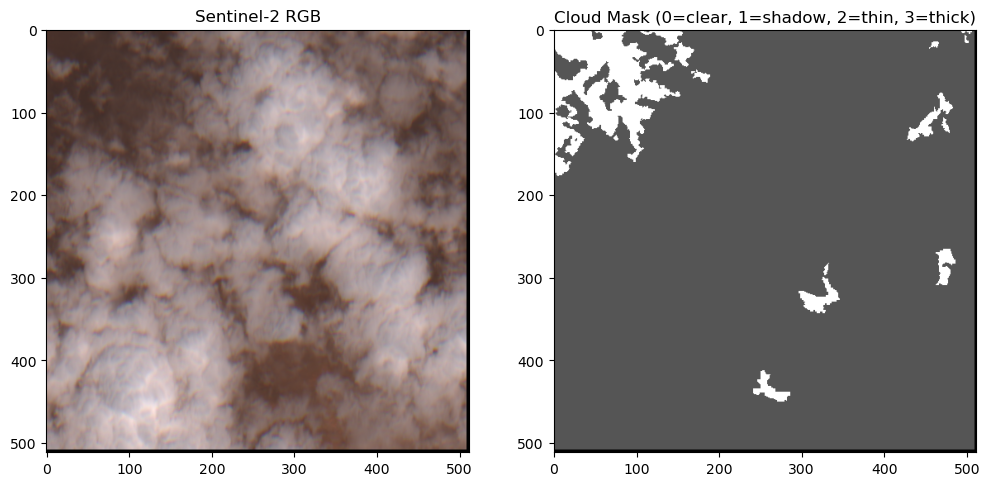

In [29]:
# Sentinel-2 TRUE COLOR bands (R,G,B) = (B4,B3,B2) = (band 4,3,2)
rgb = img[[3,2,1], :, :]    # 4th,3rd,2nd index because zero-based

# Normalize for display
rgb = np.clip(rgb / 10000, 0, 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(np.transpose(rgb, (1, 2, 0)))
ax[0].set_title("Sentinel-2 RGB")

ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Cloud Mask (0=clear, 1=shadow, 2=thin, 3=thick)")

plt.show()

# Dataset Integrity Check

In [30]:
import os
import rasterio as rio
import numpy as np
import pandas as pd
from tqdm import tqdm

BASE_DIR = r"D:\Nitin\MS - AAI\10. Capstone Project\Project\Data\CloudSEN12_Plus_13band_4Class"

splits = ["train", "val", "test"]

records = []
VALID_MASK_VALUES = {0,1,2,3}

print("\n🔍 RUNNING DATASET INTEGRITY CHECK...\n")

for split in splits:

    img_dir  = f"{BASE_DIR}/{split}/images"
    mask_dir = f"{BASE_DIR}/{split}/masks"

    tiles = sorted(os.listdir(img_dir))
    print(f"📁 Checking {split.upper()} — {len(tiles)} tiles")

    for fname in tqdm(tiles, desc=f"{split}"):
        tile_id = fname.replace(".tif", "")

        img_path  = f"{img_dir}/{tile_id}.tif"
        mask_path = f"{mask_dir}/{tile_id}.tif"

        ok = True
        msg = ""

        # ---------------- IMAGE CHECK ----------------
        try:
            with rio.open(img_path) as src:
                img_shape = (src.count, src.height, src.width)
                img_dtype = src.dtypes[0]
        except Exception as e:
            ok = False
            msg += f"[IMG_READ_FAIL:{e}] "
            img_shape = None
            img_dtype = None

        if img_shape != (13,512,512):
            ok = False
            msg += "[IMG_SHAPE_FAIL] "

        # ---------------- MASK CHECK ----------------
        try:
            with rio.open(mask_path) as src:
                mask = src.read(1)
                mask_shape = mask.shape
                uniq = tuple(sorted(np.unique(mask)))
                mask_dtype = mask.dtype
        except Exception as e:
            ok = False
            msg += f"[MASK_READ_FAIL:{e}] "
            mask_shape = None
            uniq = None
            mask_dtype = None

        if mask_shape != (512,512):
            ok = False
            msg += "[MASK_SHAPE_FAIL] "

        if uniq is not None and not set(uniq).issubset(VALID_MASK_VALUES):
            ok = False
            msg += f"[BAD_MASK_VALUES:{uniq}] "

        records.append([
            split,
            tile_id,
            ok,
            img_shape,
            img_dtype,
            mask_shape,
            mask_dtype,
            uniq,
            msg
        ])

df_check = pd.DataFrame(records, columns=[
    "split", "tile_id", "ok",
    "img_shape", "img_dtype",
    "mask_shape", "mask_dtype",
    "mask_values", "issues"
])

df_check.to_csv("cloudsen12_integrity_report.csv", index=False)

print("\n📄 Saved → cloudsen12_integrity_report.csv\n")
print(df_check["ok"].value_counts())



🔍 RUNNING DATASET INTEGRITY CHECK...

📁 Checking TRAIN — 1083 tiles


train: 100%|██████████| 1083/1083 [01:05<00:00, 16.45it/s]


📁 Checking VAL — 192 tiles


val: 100%|██████████| 192/192 [00:10<00:00, 18.17it/s]


📁 Checking TEST — 225 tiles


test: 100%|██████████| 225/225 [00:12<00:00, 18.14it/s]


📄 Saved → cloudsen12_integrity_report.csv

ok
True    1500
Name: count, dtype: int64


In [32]:
import pandas as pd
import ast

df = pd.read_csv("cloudsen12_integrity_report.csv")

print("Total rows:", len(df))
print(df["ok"].value_counts(), "\n")

# -------------------------
# IMAGE SHAPE SUMMARY
# -------------------------
print("IMAGE SHAPE DISTRIBUTION:")
print(df["img_shape"].value_counts(), "\n")

# -------------------------
# MASK SHAPE SUMMARY
# -------------------------
print("MASK SHAPE DISTRIBUTION:")
print(df["mask_shape"].value_counts(), "\n")

# -------------------------
# MASK UNIQUE VALUE SETS
# (convert string "(0,1,3)" → tuple)
# -------------------------
df["mask_values_tuple"] = df["mask_values"].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else None)

print("\nMASK VALUE DISTRIBUTION:")
print(df["mask_values_tuple"].value_counts(), "\n")

# -------------------------
# SHOW ANY BAD TILES
# -------------------------
bad = df[df["ok"] == False]

print("\n BAD / CORRUPTED TILES:", len(bad))
if len(bad) > 0:
    display(bad.head(10))

Total rows: 1500
ok
True    1500
Name: count, dtype: int64 

IMAGE SHAPE DISTRIBUTION:
img_shape
(13, 512, 512)    1500
Name: count, dtype: int64 

MASK SHAPE DISTRIBUTION:
mask_shape
(512, 512)    1500
Name: count, dtype: int64 


MASK VALUE DISTRIBUTION:
mask_values_tuple
(0,)            740
(0, 1, 3)       387
(0, 1, 2, 3)    235
(0, 1, 2)        79
(0, 2)           38
(0, 2, 3)        10
(0, 1)            9
(0, 3)            2
Name: count, dtype: int64 


 BAD / CORRUPTED TILES: 0
